### Import Library


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [2]:
# Load Datasets
diabetes_df = pd.read_csv("https://raw.githubusercontent.com/natalio123/FitGuard/main/data/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# EDA

In [3]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
diabetes_df.duplicated().sum()

0

In [6]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Menghapus Outlier
numerical_columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
]

for column in numerical_columns:
    Q1 = diabetes_df[column].quantile(0.25)
    Q3 = diabetes_df[column].quantile(0.75)
    IQR = Q3 - Q1

    maximum = Q3 + (1.5 * IQR)
    minimum = Q1 - (1.5 * IQR)

    # Menentukan kondisi untuk outlier
    kondisi_lower_than = diabetes_df[column] < minimum
    kondisi_more_than = diabetes_df[column] > maximum

    # Menghapus outlier dari DataFrame
    diabetes_df.drop(diabetes_df[kondisi_lower_than].index, inplace=True)
    diabetes_df.drop(diabetes_df[kondisi_more_than].index, inplace=True)

# Menampilkan DataFrame setelah menghapus outlier
max_min_summary = diabetes_df[numerical_columns].agg(['min', 'max']).transpose()

# Menampilkan hasil
print(max_min_summary)


                             min      max
Pregnancies                0.000   13.000
Glucose                   44.000  198.000
BloodPressure             38.000  106.000
SkinThickness              0.000   60.000
Insulin                    0.000  330.000
BMI                       18.200   49.600
DiabetesPedigreeFunction   0.078    1.162
Age                       21.000   65.000


C:\Users\ACER\AppData\Local\Temp\ipykernel_13904\380936290.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  diabetes_df.drop(diabetes_df[kondisi_more_than].index, inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_13904\380936290.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  diabetes_df.drop(diabetes_df[kondisi_more_than].index, inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_13904\380936290.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  diabetes_df.drop(diabetes_df[kondisi_more_than].index, inplace=True)


In [8]:
diabetes_df['Pregnancies'].agg(['min', 'max'])

min     0
max    13
Name: Pregnancies, dtype: int64

## Uji korelasi

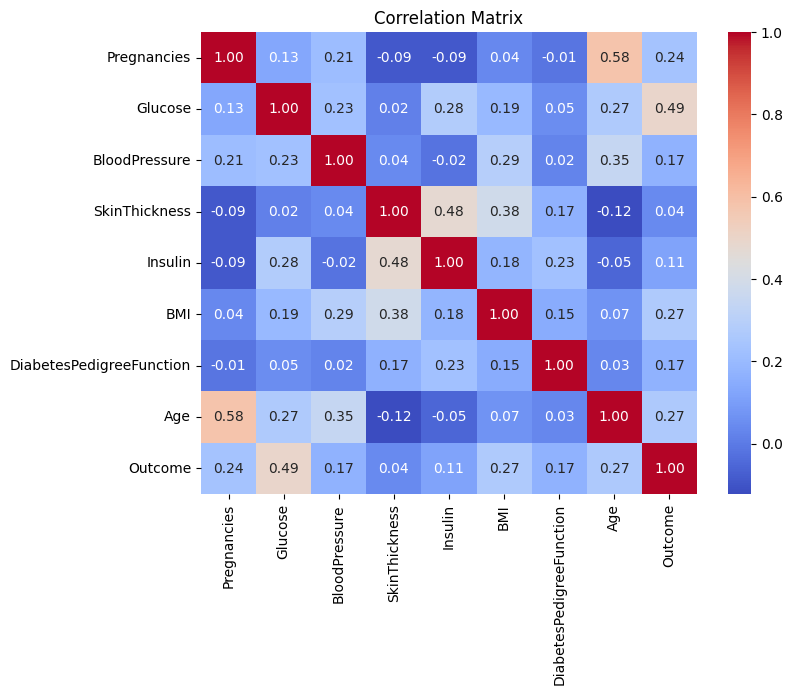

In [9]:
correlation_matrix=diabetes_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [10]:
diabetes_df.groupby('Outcome').agg(
    Pregnancies_mean=('Pregnancies', 'mean'),
    Glucose_mean=('Glucose', 'mean'),
    BloodPressure_mean=('BloodPressure', 'mean'),
    SkinThickness_mean=('SkinThickness', 'mean'),
    Insulin_mean=('Insulin', 'mean'),
    BMI_mean=('BMI', 'mean'),
    DiabetesPedigreeFunction_mean=('DiabetesPedigreeFunction', 'mean'),
    Age_mean=('Age', 'mean'))


,Pregnancies_mean,Glucose_mean,BloodPressure_mean,SkinThickness_mean,Insulin_mean,BMI_mean,DiabetesPedigreeFunction_mean,Age_mean
Outcome,,,,,,,,
0,3.273349,109.293850,70.712984,20.312073,62.601367,30.817768,0.398658,30.610478
1,4.928934,140.208122,74.893401,21.710660,83.314721,34.518782,0.487695,36.888325


### Data Visualitation

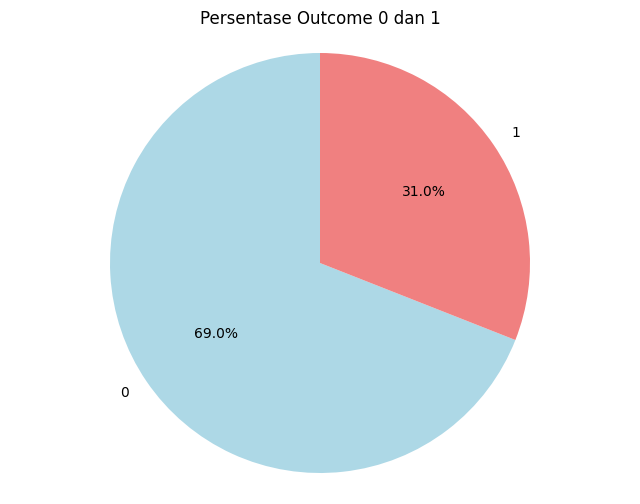

In [11]:
# Menghitung jumlah untuk setiap nilai Outcome
outcome_counts = diabetes_df['Outcome'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Persentase Outcome 0 dan 1')
plt.axis('equal')  # Agar pie chart berbentuk lingkaran

# Menampilkan plot
plt.show()

In [12]:
# Menghitung jumlah orang yang terkena diabetes berdasarkan jumlah kehamilan
diabetes_by_pregnancies = diabetes_df[diabetes_df['Outcome'] == 1].groupby('Pregnancies').size()

# Menampilkan hasil
print(diabetes_by_pregnancies)

Pregnancies
0     24
1     20
2     12
3     23
4     17
5     17
6     12
7     21
8     16
9     14
10     9
11     5
12     4
13     3
dtype: int64


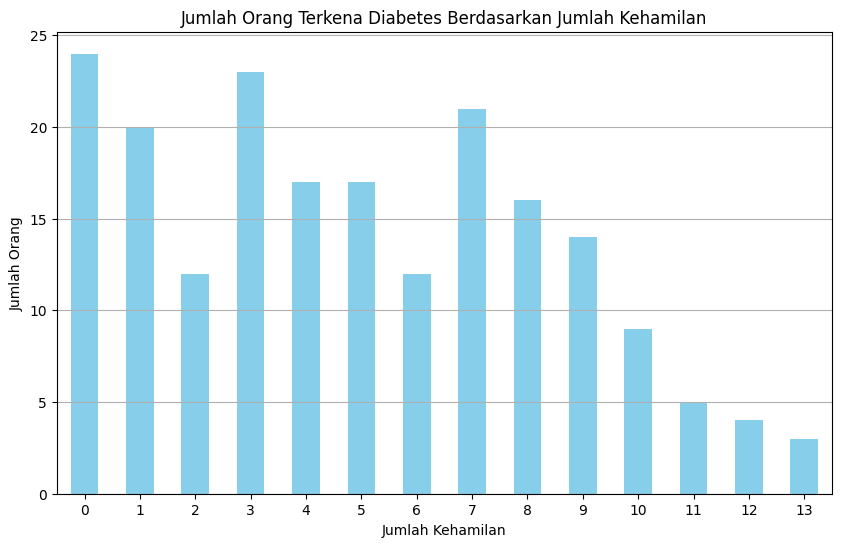

In [13]:
# Membuat visualisasi
plt.figure(figsize=(10, 6))
diabetes_by_pregnancies.plot(kind='bar', color='skyblue')
plt.title('Jumlah Orang Terkena Diabetes Berdasarkan Jumlah Kehamilan')
plt.xlabel('Jumlah Kehamilan')
plt.ylabel('Jumlah Orang')
plt.xticks(rotation=0)  # Memutar label sumbu x agar lebih mudah dibaca
plt.grid(axis='y')

# Menampilkan plot
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_13904\1643818066.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Outcome', y='Glucose', data=diabetes_df, jitter=True, palette='Set2', alpha=0.6)


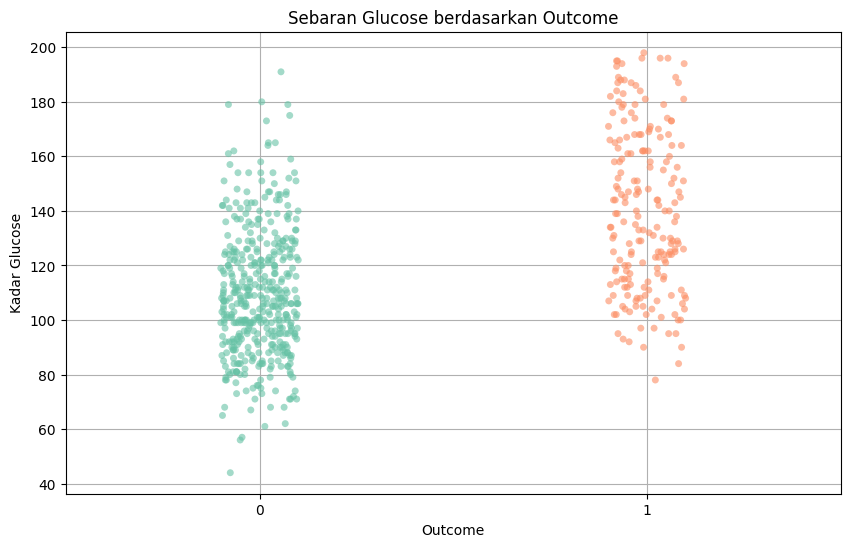

In [14]:
# Membuat strip plot untuk Glucose berdasarkan Outcome
plt.figure(figsize=(10, 6))
sns.stripplot(x='Outcome', y='Glucose', data=diabetes_df, jitter=True, palette='Set2', alpha=0.6)
plt.title('Sebaran Glucose berdasarkan Outcome')
plt.xlabel('Outcome')
plt.ylabel('Kadar Glucose')
plt.grid(True)

# Menampilkan plot
plt.show()

# Modelling


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib


**Pemisahan Dataset** <br>
Train dan Test,
80% data untuk train dan 20% untuk test.


In [16]:
X = diabetes_df.drop(columns='Outcome', axis= 1)
y = diabetes_df['Outcome']

# fitur" yang digunakan disimpan di variabel `X` dan labelnya di `y`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Feature Scaling**

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2

model = Sequential([
    Dense(64, activation='relu',kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Dropout mencegah overfitting
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))
])

optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-3,momentum=0.85)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [21]:
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True),
    ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
]

In [22]:
history = model.fit(
    X_train, y_train,
    epochs=300,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks
)

Epoch 1/300


11/13 [========================>.....] - ETA: 0s - loss: 1.2986 - accuracy: 0.6449 
Epoch 1: val_accuracy improved from -inf to 0.74510, saving model to best_model.keras
13/13 [==============================] - 5s 89ms/step - loss: 1.2621 - accuracy: 0.6576 - val_loss: 0.9344 - val_accuracy: 0.7451
Epoch 2/300
11/13 [========================>.....] - ETA: 0s - loss: 0.8369 - accuracy: 0.7188
Epoch 2: val_accuracy improved from 0.74510 to 0.77451, saving model to best_model.keras
13/13 [==============================] - 0s 40ms/step - loss: 0.8112 - accuracy: 0.7438 - val_loss: 0.6673 - val_accuracy: 0.7745
Epoch 3/300
12/13 [==========================>...] - ETA: 0s - loss: 0.6440 - accuracy: 0.7969
Epoch 3: val_accuracy improved from 0.77451 to 0.79412, saving model to best_model.keras
13/13 [==============================] - 1s 74ms/step - loss: 0.6446 - accuracy: 0.7906 - val_loss: 0.5649 - val_accuracy: 0.7941
Epoch 4/300
11/13 [========================>.....] - ETA: 

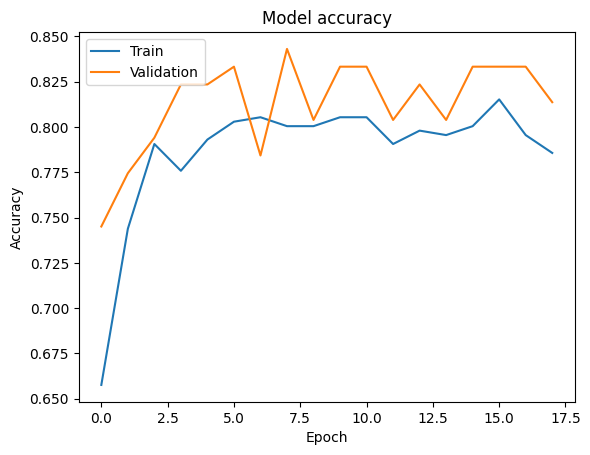

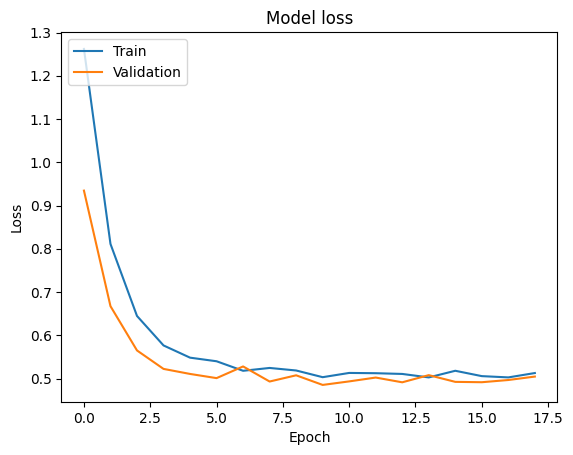

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

4/4 [==============================] - 0s 5ms/step


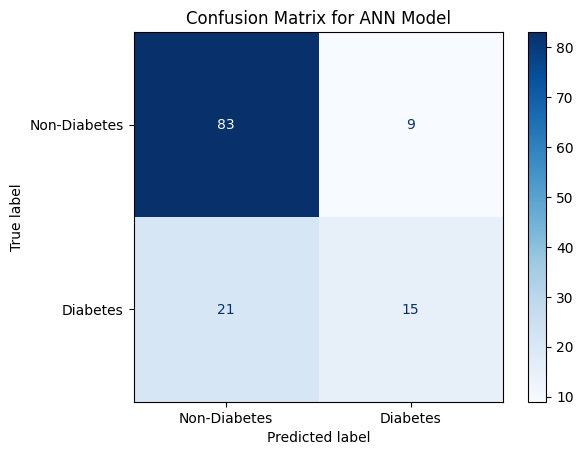

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Diabetes", "Diabetes"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for ANN Model")
plt.show()


In [25]:
model.save('diabetes_prediction_model.h5')

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Evaluation

**Evaluasi Model ANN Tensorflow**

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

In [27]:
# model.load_weights('diabetes_prediction_model.h5')
model.load_weights('best_model.keras')

In [28]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.7656


In [29]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

4/4 [==============================] - 0s 5ms/step


In [30]:
def rekomendasi_nutrisi(glucose, bmi, age):

    if glucose >= 140 or bmi >= 30:
        return "Diet rendah karbohidrat dengan serat tinggi dan protein moderat."
    elif age >= 50 and bmi < 25:
        return "Diet seimbang rendah lemak dengan kontrol gula."
    elif 25 <= bmi < 30:
        return "Fokus pada protein tanpa lemak, karbohidrat kompleks, dan hindari makanan GI tinggi."
    else:
        return "Diet seimbang yang umum."

# implementasi rekomendasi untuk data prediksi
for i in range(128):  # Hanya contoh untuk 5 pasien
    glucose = X_test[i][1]  # Mengambil fitur Glucose dari X_test
    bmi = X_test[i][5]      # Mengambil fitur BMI dari X_test
    age = X_test[i][7]      # Mengambil fitur Age dari X_test
    rekomendasi = rekomendasi_nutrisi(glucose, bmi, age)
    print(f"Pasien {i+1} Rekomendasi Nutrisi: {rekomendasi}")

Pasien 1 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 2 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 3 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 4 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 5 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 6 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 7 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 8 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 9 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 10 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 11 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 12 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 13 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 14 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 15 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 16 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 17 Rekomendasi Nutrisi: Diet seimbang yang umum.
Pasien 18 Rekomendasi Nutrisi: Diet seimbang yang umum.
P

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

diabetes_df['cluster'] = clusters

recommendations = {
   0: "Kurangin nasi, banyakin makan yang banyak proteinnya.",
   1: "Makannya dijaga, nasi dikit aja, sayur sama buah jangan lupa.",
   2: "Banyakin makan sayur sama buah, sama yang berserat kayak roti gandum."
}

# Assign recommendations to each cluster
diabetes_df['nutrition_recommendation'] = diabetes_df['cluster'].map(recommendations)

In [32]:
def predict_and_recommend(new_data):

    new_data = new_data.rename(columns={
        'glucose': 'Glucose',
        'bmi': 'BMI',
        'age': 'Age'
    })


    for col in ['BloodPressure', 'Insulin', 'DiabetesPedigreeFunction', 'Pregnancies', 'SkinThickness']:  # Add missing columns
        if col not in new_data.columns:
            new_data[col] = 0  # Or use other suitable values


    new_data = new_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]  # Reorder columns

    new_data_scaled = scaler.transform(new_data)


    diabetes_risk = model.predict(new_data_scaled)
    diabetes_prediction = (diabetes_risk > 0.5).astype(int)


    new_clusters = kmeans.predict(new_data_scaled)
    recs = [recommendations[cluster] for cluster in new_clusters]


    for i, risk in enumerate(diabetes_prediction):
        print(f"Patient {i+1} - Diabetes Risk: {'Yes' if risk else 'No'}, Recommendation: {recs[i]}")

# Tes data pasien
new_patients = pd.DataFrame({
    'glucose': [120, 150, 200],
    'bmi': [28, 35, 300],
    'age': [50, 65, 45]
})

predict_and_recommend(new_patients)

1/1 [==============================] - 0s 243ms/step
Patient 1 - Diabetes Risk: No, Recommendation: Kurangin nasi, banyakin makan yang banyak proteinnya.
Patient 2 - Diabetes Risk: Yes, Recommendation: Kurangin nasi, banyakin makan yang banyak proteinnya.
Patient 3 - Diabetes Risk: Yes, Recommendation: Kurangin nasi, banyakin makan yang banyak proteinnya.


c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Test Accuracy: 0.7656
4/4 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        92
           1       0.62      0.42      0.50        36

    accuracy                           0.77       128
   macro avg       0.71      0.66      0.67       128
weighted avg       0.75      0.77      0.75       128



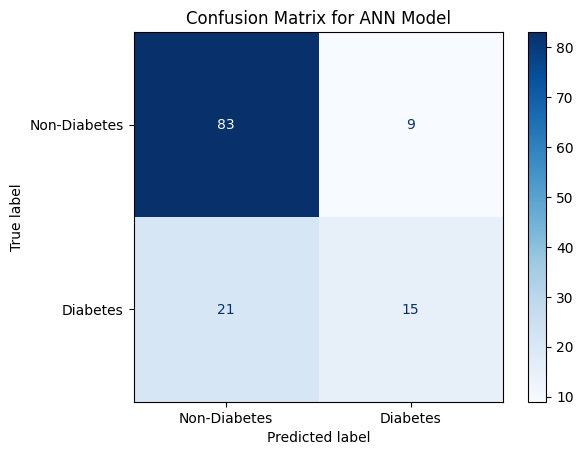

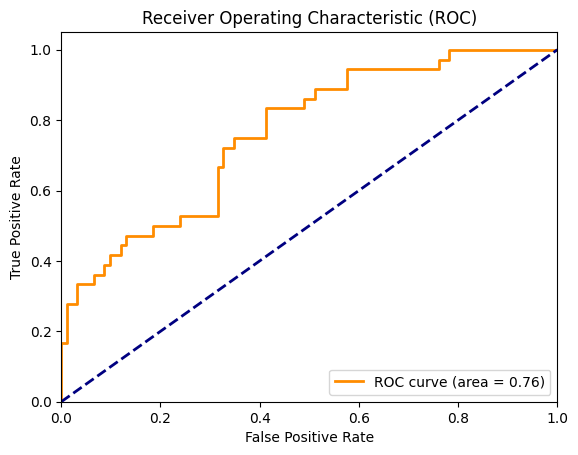

In [33]:

model.load_weights('best_model.keras')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Diabetes', 'Diabetes'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for ANN Model')
plt.show()

# ROC Curve and AUC
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# You can also analyze other metrics like precision, recall, F1-score, etc.
# based on the classification report and confusion matrix.